In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

incom_df = pd.read_csv("/kaggle/input/income-prediction-dataset-us-20th-century-data/Income Prediction./Test.csv")
display(incom_df.head())
print(incom_df.info())

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [2]:
print(incom_df.gender.value_counts())
print(incom_df.education.value_counts())
print(incom_df.marital_status.value_counts())
print(incom_df.is_hispanic.value_counts())
print(incom_df[["age", "wage_per_hour", "working_week_per_year"]].describe())

gender
 Female    46991
 Male      42795
Name: count, dtype: int64
education
 High school graduate                      21927
 Children                                  21179
 Some college but no degree                12454
 Bachelors degree(BA AB BS)                 8771
 7th and 8th grade                          3718
 10th grade                                 3465
 11th grade                                 3139
 Masters degree(MA MS MEng MEd MSW MBA)     2986
 9th grade                                  2795
 Associates degree-occup /vocational        2398
 Associates degree-academic program         1948
 5th or 6th grade                           1449
 12th grade no diploma                       981
 Prof school degree (MD DDS DVM LLB JD)      817
 1st 2nd 3rd or 4th grade                    788
 Doctorate degree(PhD EdD)                   565
 Less than 1st grade                         406
Name: count, dtype: int64
marital_status
 Never married                      38905
 Marrie

In [3]:
incom_df[incom_df.select_dtypes("object").columns] = incom_df[incom_df.select_dtypes("object").columns]\
.apply(lambda x: x.str.lstrip(), axis=1)


high_school = ["10th grade", "11th grade", "9th grade", "12th grade no diploma"]
high = "High school"

meidde_school = "7th and 8th grade"
meidde = "meidde school"

elementary_school = ["5th or 6th grade", "1st 2nd 3rd or 4th grade"]
elementary = "elementary school"
incom_df["education"] = incom_df["education"].replace(high_school,high)
incom_df["education"] = incom_df["education"].replace(meidde_school,meidde)
incom_df["education"] = incom_df["education"].replace(elementary_school,elementary)
incom_df["education"] = incom_df["education"].replace("Less than 1st grade","Children")
print(incom_df["education"].value_counts())

education
High school graduate                      21927
Children                                  21585
Some college but no degree                12454
High school                               10380
Bachelors degree(BA AB BS)                 8771
meidde school                              3718
Masters degree(MA MS MEng MEd MSW MBA)     2986
Associates degree-occup /vocational        2398
elementary school                          2237
Associates degree-academic program         1948
Prof school degree (MD DDS DVM LLB JD)      817
Doctorate degree(PhD EdD)                   565
Name: count, dtype: int64


In [4]:

Married = ["Married-civilian spouse present","Married-spouse absent", "Married-A F spouse present"]
incom_df["marital_status"] = incom_df["marital_status"].replace(Married,"Married")
incom_df["marital_status"] = incom_df["marital_status"].replace("Separated","Divorced")

print(incom_df["marital_status"].value_counts())

marital_status
Never married    38905
Married          38858
Divorced          7264
Widowed           4759
Name: count, dtype: int64


In [5]:
clean_incom = incom_df[(incom_df["wage_per_hour"]!=0) & (incom_df["working_week_per_year"]!=0)]
IQR1 = clean_incom.wage_per_hour.quantile(.75) - clean_incom.wage_per_hour.quantile(.25)
lower_1 = clean_incom.wage_per_hour.quantile(.25) - (1.5 * IQR1)
upper_1 = clean_incom.wage_per_hour.quantile(.75) + (1.5 * IQR1)

IQR2 = clean_incom.working_week_per_year.quantile(.75) - clean_incom.working_week_per_year.quantile(.25)
lower_2 = clean_incom.working_week_per_year.quantile(.25) - (1.5 * IQR2)
upper_2 = clean_incom.working_week_per_year.quantile(.75) + (1.5 * IQR2)

con1 = ((clean_incom.wage_per_hour < upper_1) & (clean_incom.wage_per_hour > lower_1))
con2 = ((clean_incom.working_week_per_year < upper_2) & (clean_incom.working_week_per_year > lower_2))

clean_incom = clean_incom[con1 & con2]
print(clean_incom[["wage_per_hour", "working_week_per_year"]].describe())

       wage_per_hour  working_week_per_year
count    3760.000000            3760.000000
mean      954.451330              51.517553
std       416.359551               1.550158
min       100.000000              43.000000
25%       624.750000              52.000000
50%       850.000000              52.000000
75%      1200.000000              52.000000
max      2050.000000              52.000000


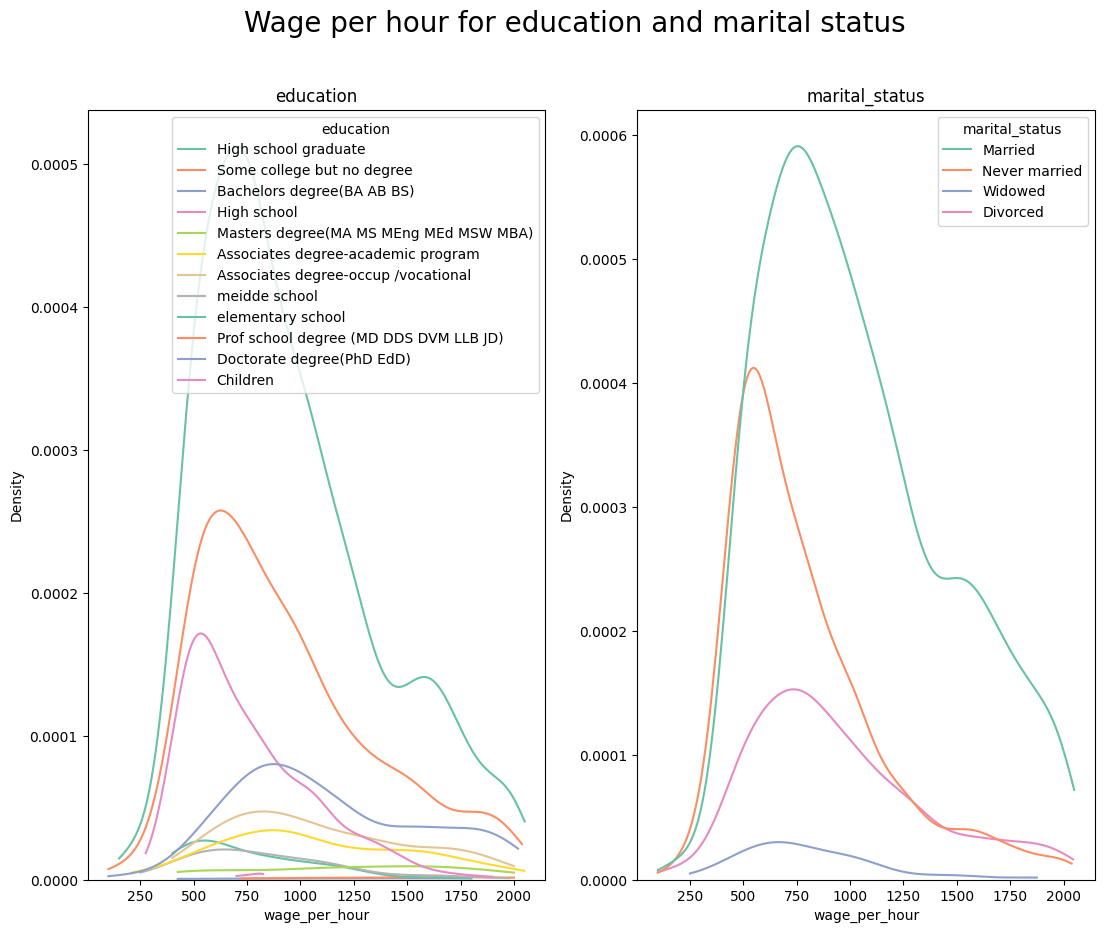

In [6]:
fig, ax = plt.subplots(ncols=2 , figsize=[13,10])
educ_plt = sns.kdeplot(data=clean_incom, x="wage_per_hour", hue="education", ax=ax[0],palette="Set2", cut=0)
marital_plt = sns.kdeplot(data=clean_incom, x="wage_per_hour", hue="marital_status", ax=ax[1],palette="Set2", cut=0)
fig.suptitle("Wage per hour for education and marital status", fontsize=20)
educ_plt.set_title("education")
marital_plt.set_title("marital_status")
plt.show()

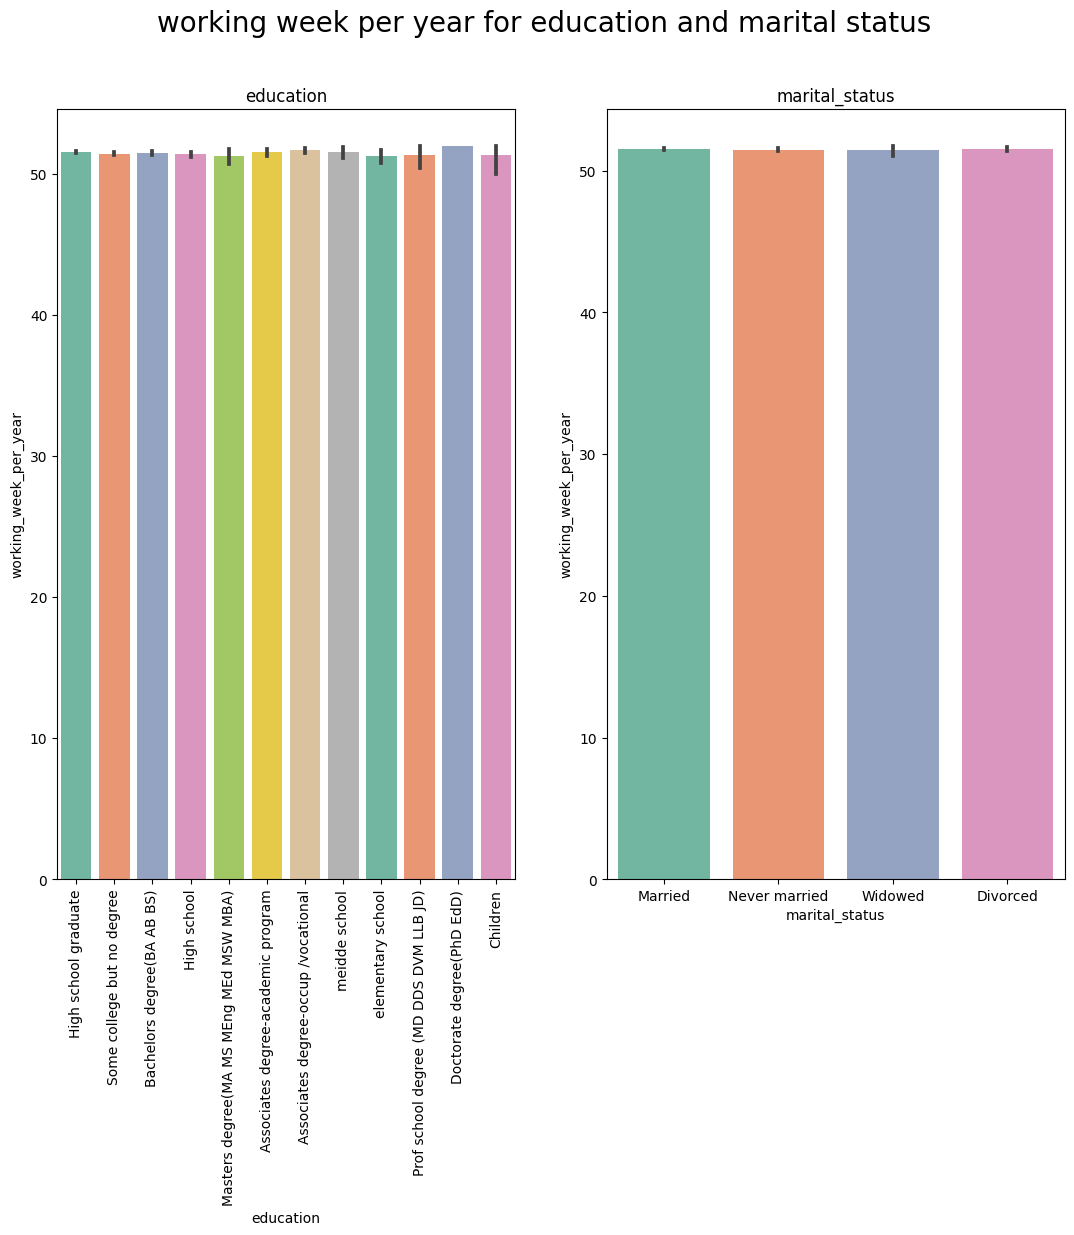

In [7]:
fig, ax = plt.subplots(ncols=2 , figsize=[13,10])
educ_plt_2 = sns.barplot(data=clean_incom, y="working_week_per_year", x="education", ax=ax[0],palette="Set2")
marital_plt_2 = sns.barplot(data=clean_incom, y="working_week_per_year", x="marital_status", ax=ax[1],palette="Set2")
fig.suptitle("working week per year for education and marital status", fontsize=20)
educ_plt_2.set_title("education")
marital_plt_2.set_title("marital_status")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.show()